> # Exploratory Data Analysis

In [125]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
import seaborn as sns
import datetime as dt
import time
import pingouin as pg
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

> # Event
- C – Closest approach to a coast, not followed by a landfall
- G – Genesis
- I – An intensity peak in terms of both pressure and wind
- L – Landfall (center of system crossing a coastline)
- P – Minimum in central pressure
- R – Provides additional detail on the intensity of the cyclone when rapid changes are underway
- S – Change of status of the system
- T – Provides additional detail on the track (position) of the cyclone
- W – Maximum sustained wind speed


> # Status
- TD – Tropical cyclone of tropical depression intensity (< 34 knots)
- TS – Tropical cyclone of tropical storm intensity (34-63 knots)
- HU – Tropical cyclone of hurricane intensity (> 64 knots)
- EX – Extratropical cyclone (of any intensity)
- SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
- SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
- LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
- WV – Tropical Wave (of any intensity)
- DB – Disturbance (of any intensity)

## Statistical Analysis for __Pacific__

In [2]:
pacific = pd.read_csv('Pacific_Cleansed.csv')

In [3]:
pacific

,Unnamed: 0,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,0,UNNAMED,1949-06-11,00:00:00,TS,20.2,106.3,45,995,40,...,27,35,13,11,9,11,5,4,3,5
1,1,UNNAMED,1949-06-11,06:00:00,TS,20.2,106.4,45,995,40,...,27,35,13,11,9,11,5,4,3,5
2,2,UNNAMED,1949-06-11,12:00:00,TS,20.2,106.7,45,995,40,...,27,35,13,11,9,11,5,4,3,5
3,3,UNNAMED,1949-06-11,18:00:00,TS,20.3,107.7,45,995,40,...,27,35,13,11,9,11,5,4,3,5
4,4,UNNAMED,1949-06-12,00:00:00,TS,20.4,108.6,45,995,40,...,27,35,13,11,9,11,5,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,26132,SANDRA,2015-11-28,12:00:00,LO,21.7,109.0,35,1002,60,...,0,0,0,0,0,0,0,0,0,0
26133,26133,SANDRA,2015-11-28,18:00:00,LO,22.4,108.7,30,1007,0,...,0,0,0,0,0,0,0,0,0,0
26134,26134,SANDRA,2015-11-29,00:00:00,LO,23.1,108.3,30,1008,0,...,0,0,0,0,0,0,0,0,0,0
26135,26135,SANDRA,2015-11-29,06:00:00,LO,23.5,107.9,25,1009,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pacific.set_index('Unnamed: 0', inplace=True)

In [19]:
pacific.describe()

,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Month,Year
count,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,17.153598,121.585851,48.949344,994.997437,40.038643,35.013200,26.989325,35.004782,13.096759,11.095191,8.976929,11.087156,5.071929,4.113517,3.098098,4.881777,8.105330,1988.825573
std,4.614122,18.662400,25.334450,12.945391,24.055514,21.723649,17.820366,23.122758,11.542860,10.218244,8.640888,10.276413,5.977859,5.242294,4.410915,5.357886,1.411275,16.884343
min,4.200000,85.200000,10.000000,872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1949.000000
25%,14.000000,108.700000,30.000000,995.000000,40.000000,35.000000,27.000000,35.000000,13.000000,11.000000,9.000000,11.000000,5.000000,4.000000,3.000000,5.000000,7.000000,1976.000000
50%,16.600000,116.600000,45.000000,995.000000,40.000000,35.000000,27.000000,35.000000,13.000000,11.000000,9.000000,11.000000,5.000000,4.000000,3.000000,5.000000,8.000000,1990.000000
75%,19.500000,129.900000,65.000000,1002.000000,40.000000,35.000000,27.000000,35.000000,13.000000,11.000000,9.000000,11.000000,5.000000,4.000000,3.000000,5.000000,9.000000,2003.000000
max,54.000000,180.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000,12.000000,2015.000000


In [46]:
# numerical columns
numcol = pacific.columns[4:-2]

# D'agostino Normality Test
### this is done to determine the normality of each column

In [88]:
listnorm = []
for i in numcol:
    test, pval = stats.normaltest(pacific[i])
    if pval < 0.05:
        listnorm.append('Normal')
    else:
        listnorm.append('Not Normal')
pd.DataFrame(listnorm, index = numcol, columns=['Shapiro-Wilk Normality'])

,Shapiro-Wilk Normality
Latitude,Normal
Longitude,Normal
Maximum Wind,Normal
Minimum Pressure,Normal
Low Wind NE,Normal
Low Wind SE,Normal
Low Wind SW,Normal
Low Wind NW,Normal
Moderate Wind NE,Normal
Moderate Wind SE,Normal


### Based on the test above this dataset is relatively normal

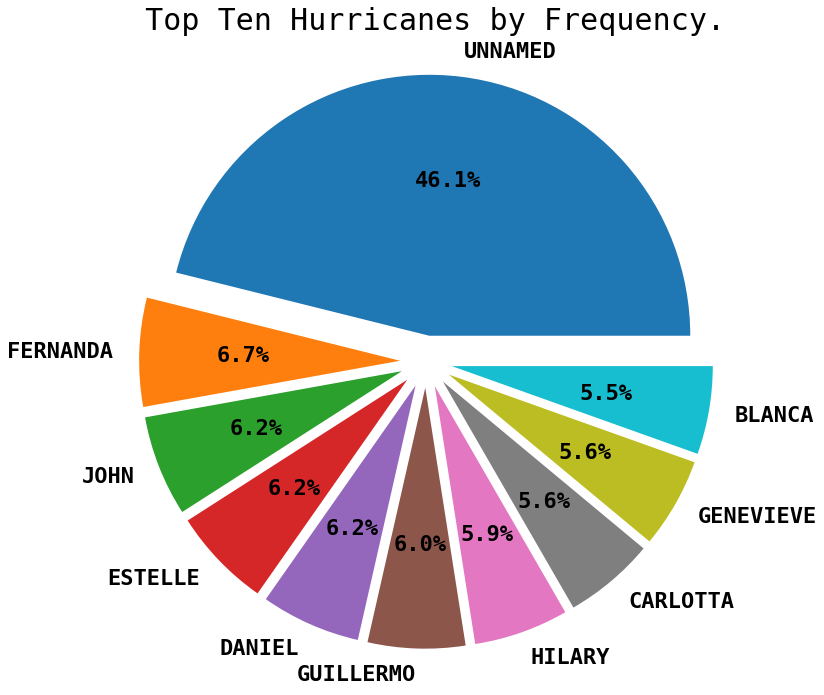

In [5]:
# Find the top ten cyclones which have occured the maximum number of times.
lst = [x.strip() for x in pacific.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[:10]]
val = pacific.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[:10]['Date'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title(' Top Ten Hurricanes by Frequency.' , fontsize = 30)
plt.show()

### Since this dataset is compiled as early as 1851 (170 years ago!) most of the tropical cyclones are unnamed.



In [6]:
pacific['Date'] = pd.to_datetime(pacific['Date'], format= '%Y-%m-%d')

In [7]:
pacific

,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,106.3,45,995,40,35,27,35,13,11,9,11,5,4,3,5
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,106.4,45,995,40,35,27,35,13,11,9,11,5,4,3,5
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,106.7,45,995,40,35,27,35,13,11,9,11,5,4,3,5
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,107.7,45,995,40,35,27,35,13,11,9,11,5,4,3,5
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,108.6,45,995,40,35,27,35,13,11,9,11,5,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,SANDRA,2015-11-28,12:00:00,LO,21.7,109.0,35,1002,60,0,0,0,0,0,0,0,0,0,0,0
26133,SANDRA,2015-11-28,18:00:00,LO,22.4,108.7,30,1007,0,0,0,0,0,0,0,0,0,0,0,0
26134,SANDRA,2015-11-29,00:00:00,LO,23.1,108.3,30,1008,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

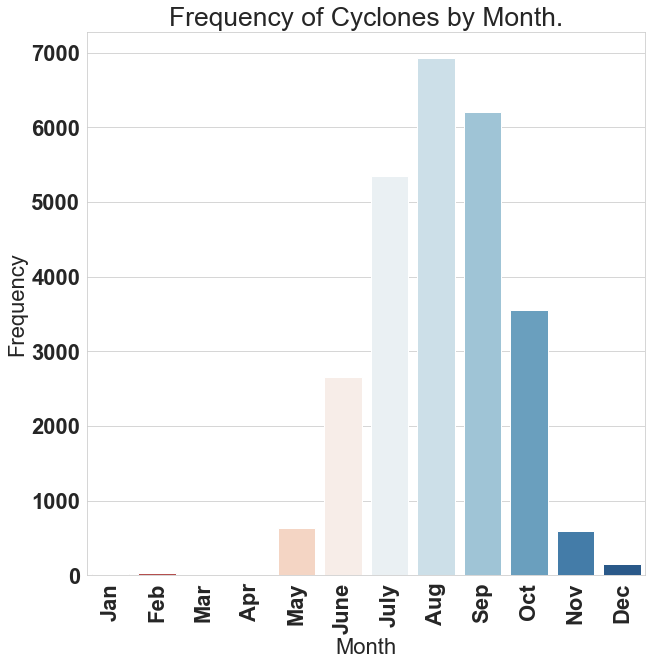

In [8]:
pacific['Month'] = pacific['Date'].apply(lambda x: x.month)
pacific['Year'] = pacific['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = pacific.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.')

### According to this chart categorized by month, Frequency of Cyclones usually peak in August, followed by September. According to Meteorologists, August is the point in hurricane season where meteorological factors are often the most favorable for tropical cyclones to develop. Temperatures on the surface layer of the ocean, referred to as Sea Surface Temperatures, are rising. This helps fuel the storms.

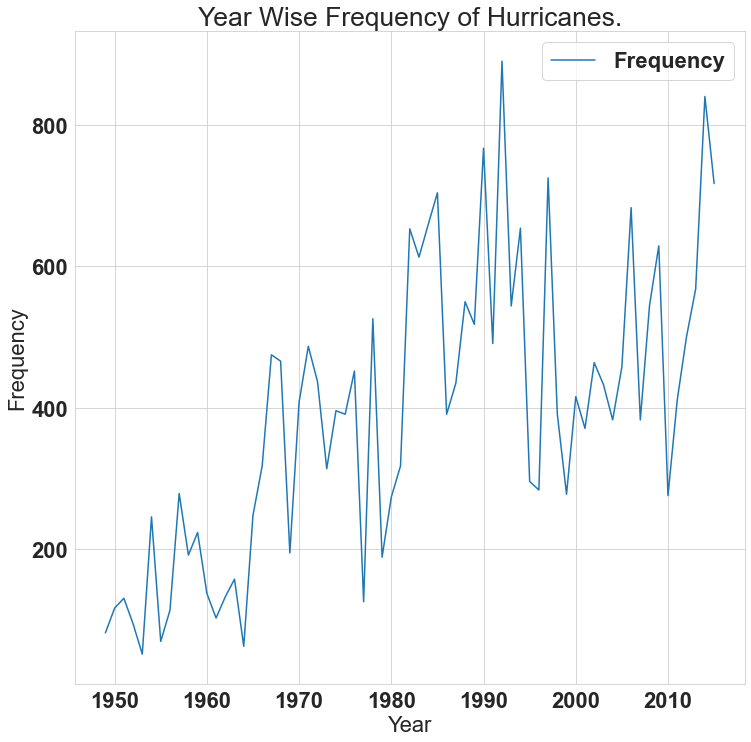

In [10]:
# Year-Wise Frequency of Hurricanes.
temp = pacific.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (12,12))
sns.lineplot(x = temp.index , y = 'Month' , data = temp , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of Hurricanes.')
plt.show()

### According to the historical chart (lineplot) above we can clearly see the increase in frequency of Tropical Cyclone each year. This is most likely caused by the impact of Climate Change. Warming seas can make cyclones more powerful and frequent by increasing the potential energy available to them, effectively increasing their power ceiling or speed limit.

In [83]:
stats.mode(pacific['Maximum Wind'])[0][0]

25

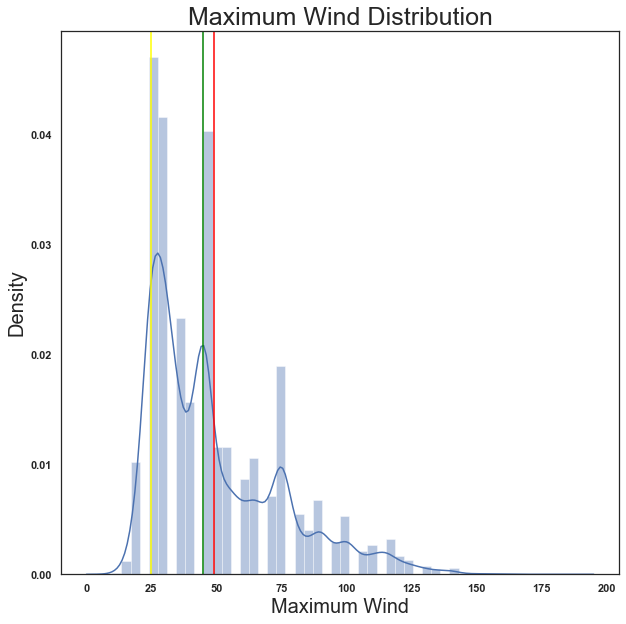

In [142]:
plt.figure(figsize=(10,10))
sns.distplot(pacific['Maximum Wind'].astype('float'))
plt.title('Maximum Wind Distribution', fontsize=25)
plt.xlabel('Maximum Wind', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.axvline(pacific['Maximum Wind'].mean(), color='red')
plt.axvline(stats.mode(pacific['Maximum Wind'])[0][0], color='yellow')
plt.axvline(pacific['Maximum Wind'].median(), color='green')
plt.show()

## This shows that Maximum Wind is distributed positively skewed (contrary to the D'agostino Test, which is caused by the extreme intensities of some of the tropical cyclones that happened of which also keeps increasing each year



<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

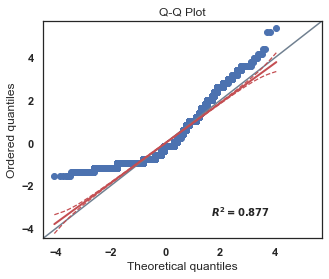

In [59]:
pg.qqplot(pacific['Maximum Wind'], dist='norm')

## This qqplot shows that Maximum Wind is Right Skewed

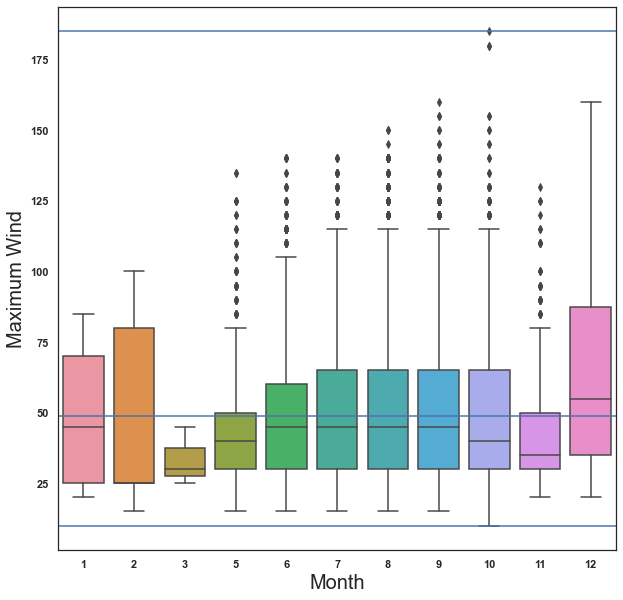

In [92]:
plt.figure(figsize=(10,10))
sns.boxplot(y='Maximum Wind', x='Month',data=pacific)
plt.axhline(pacific['Maximum Wind'].mean())
plt.axhline(pacific['Maximum Wind'].max())
plt.axhline(pacific['Maximum Wind'].min())
plt.xlabel('Month',fontsize=20)
plt.ylabel('Maximum Wind',fontsize=20)
plt.show()

## This shows that there are many outliers in the Maximum Wind Columns but we will not be removing the outliers because the most catastrophic cyclones have extreme intensities (and they keep increasing each year)

In [95]:
Q1 = pacific['Maximum Wind'].quantile(0.25)
Q3 = pacific['Maximum Wind'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

35.0


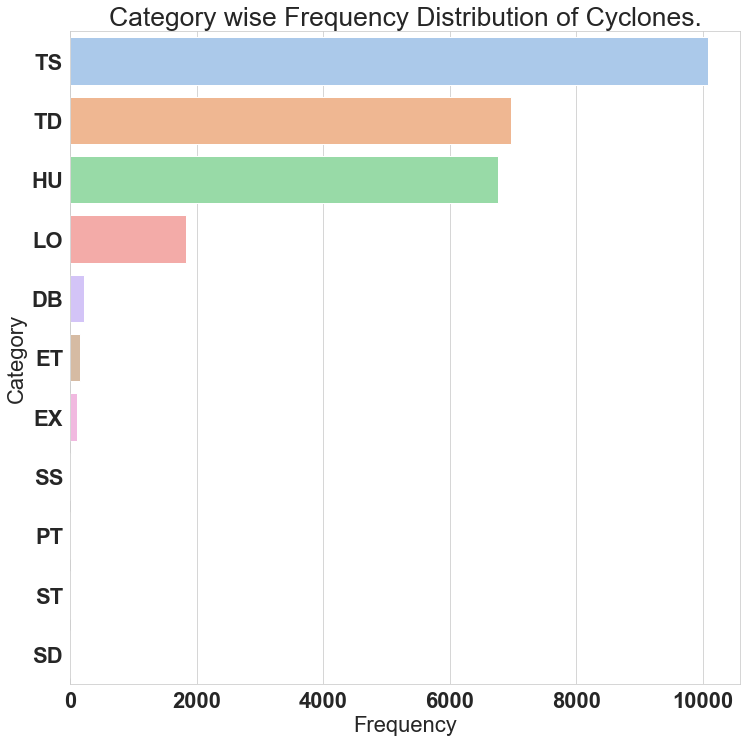

In [16]:
## Frequency of Cyclones by Category
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)
temp = pacific.groupby('Status').count().sort_values(by = 'Date' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'Date' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()

## We can see that most of the cyclones that happened in North Pacific is Tropical cyclone of tropical storm intensity (34-63 knots) (TS) followed by Tropical cyclone of tropical depression intensity (< 34 knots) (TD)

In [17]:
pacific

,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Month,Year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,106.3,45,995,40,35,...,13,11,9,11,5,4,3,5,6,1949
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,106.4,45,995,40,35,...,13,11,9,11,5,4,3,5,6,1949
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,106.7,45,995,40,35,...,13,11,9,11,5,4,3,5,6,1949
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,107.7,45,995,40,35,...,13,11,9,11,5,4,3,5,6,1949
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,108.6,45,995,40,35,...,13,11,9,11,5,4,3,5,6,1949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,SANDRA,2015-11-28,12:00:00,LO,21.7,109.0,35,1002,60,0,...,0,0,0,0,0,0,0,0,11,2015
26133,SANDRA,2015-11-28,18:00:00,LO,22.4,108.7,30,1007,0,0,...,0,0,0,0,0,0,0,0,11,2015
26134,SANDRA,2015-11-29,00:00:00,LO,23.1,108.3,30,1008,0,0,...,0,0,0,0,0,0,0,0,11,2015


<AxesSubplot:>

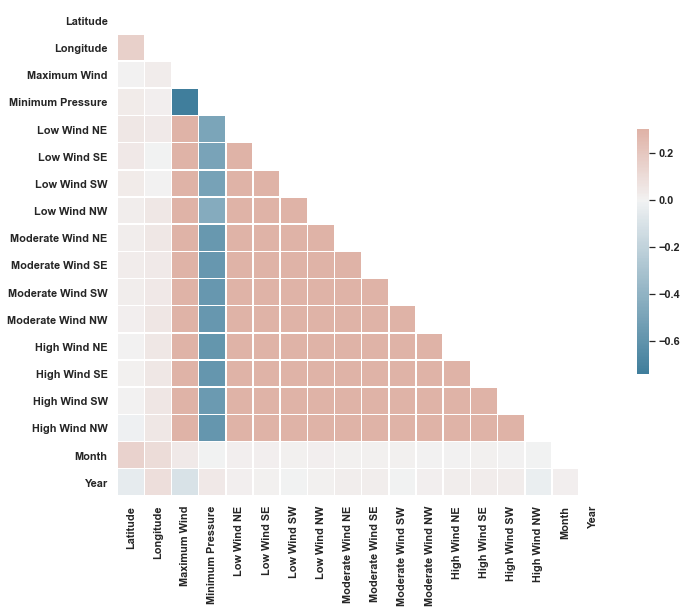

In [18]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = pacific.drop('Status',axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### This shows that Maximum Wind is negatively correlated with Minimum Pressure The lower the pressure the higher the Maximum Wind ( Maximum Wind is a common indicator of the intensity of the storm). This makes sense since Tropical Cyclones naturally occur in low-pressure areas therefore the lower the Minimum Pressure the higher the intensity.




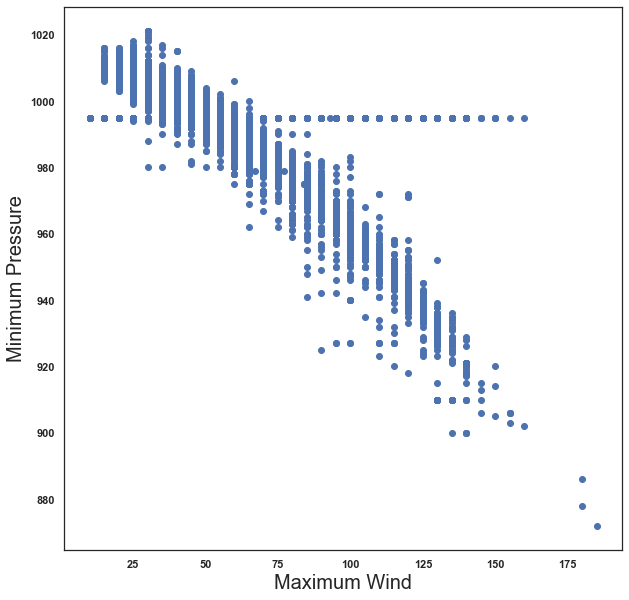

In [132]:
plt.figure(figsize=(10,10))
plt.scatter('Maximum Wind', 'Minimum Pressure',data=pacific)
plt.xlabel('Maximum Wind', fontsize=20)
plt.ylabel('Minimum Pressure', fontsize=20)
plt.show()

### This Scatter plot shows that Maximum Wind is negatively correlated with Minimum Pressure The lower the pressure the higher the  Maximum Wind ( Maximum Wind is a common  indicator of the intensity of the storm). This makes sense since Tropical Cyclones naturally occur in low-pressure areas therefore the lower the Minimum Pressure the higher the intensity.

# Upper whisker Outliers analysis

In [117]:
a = pacific[pacific['Maximum Wind'] > (Q3 + 1.5 * IQR)].groupby('Month').count()[['Name']]
a.rename(columns={'Name': 'Cyclones'}, inplace=True)
a

,Cyclones
Month,
5,8
6,36
7,62
8,144
9,125
10,59
11,4
12,23


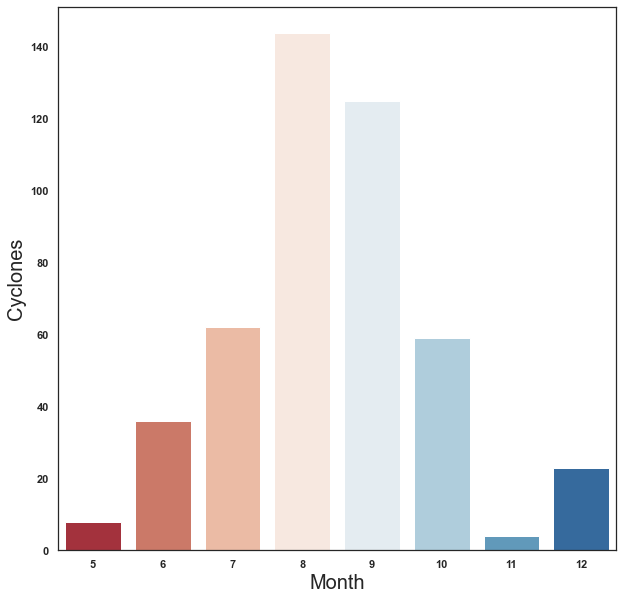

In [124]:
plt.figure(figsize=(10,10))
sns.barplot(x = a.index , y = 'Cyclones' , data=a , palette = 'RdBu' )
plt.xlabel('Month', fontsize=20)
plt.ylabel('Cyclones', fontsize=20)
plt.show()

## This shows that the outliers are distributed similarly like the non outliers data

In [21]:
pacific.to_csv('Pacific_for_Modelling.csv')